## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from IPython.display import clear_output

## Dataset Manipulation and Analysis

In [2]:
df = pd.read_csv('../datasets/heart.csv')
df1 = pd.read_csv('../datasets/o2Saturation.csv')
df = df.join(df1)

In [3]:
columns = df.columns.to_list()
columns = ['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng',
           'oldpeak','slp','caa','thall','O2','output']

In [4]:
df = df[columns]
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,O2,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,98.6,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,98.6,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,98.6,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,98.6,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,98.1,1


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
O2          0
output      0
dtype: int64

In [6]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,O2,output
age,1.00,-0.10,-0.07,0.28,0.21,0.12,-0.12,-0.40,0.10,0.21,-0.17,0.28,0.07,-0.00,-0.23
sex,-0.10,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.04,0.14,0.10,-0.03,0.12,0.21,-0.10,-0.28
cp,-0.07,-0.05,1.00,0.05,-0.08,0.09,0.04,0.30,-0.39,-0.15,0.12,-0.18,-0.16,0.15,0.43
trtbps,0.28,-0.06,0.05,1.00,0.12,0.18,-0.11,-0.05,0.07,0.19,-0.12,0.10,0.06,0.04,-0.14
chol,0.21,-0.20,-0.08,0.12,1.00,0.01,-0.15,-0.01,0.07,0.05,-0.00,0.07,0.10,-0.02,-0.09
fbs,0.12,0.05,0.09,0.18,0.01,1.00,-0.08,-0.01,0.03,0.01,-0.06,0.14,-0.03,-0.02,-0.03
restecg,-0.12,-0.06,0.04,-0.11,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.07,-0.01,0.10,0.14
thalachh,-0.40,-0.04,0.30,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.39,-0.21,-0.10,0.16,0.42
exng,0.10,0.14,-0.39,0.07,0.07,0.03,-0.07,-0.38,1.00,0.29,-0.26,0.12,0.21,-0.06,-0.44
oldpeak,0.21,0.10,-0.15,0.19,0.05,0.01,-0.06,-0.34,0.29,1.00,-0.58,0.22,0.21,0.03,-0.43


In [7]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,O2,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,97.484488,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.352649,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.500000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,97.500000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,97.500000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,97.500000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,98.600000,1.000000


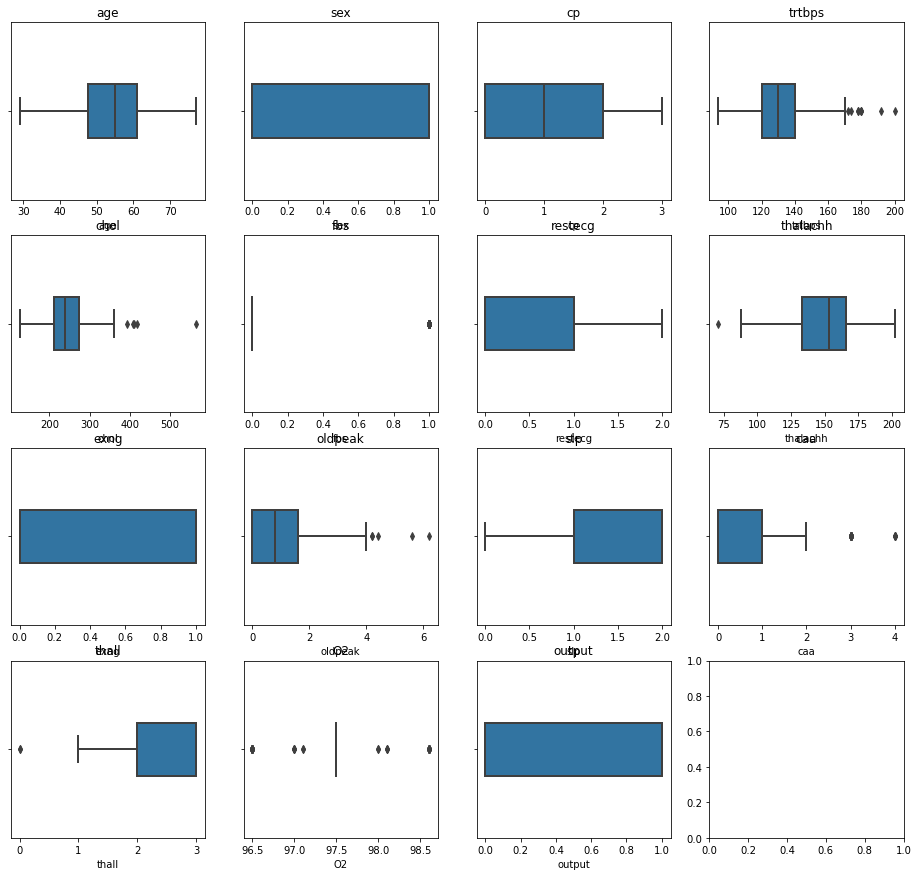

In [39]:
def creating_plots(x_plot, y_plot, dataframe):
    fig, ax = plt.subplots(x_plot, y_plot, figsize=(16, 15))
    cont = 0
    
    for i in range(0, x_plot):
        for j in range(0, y_plot):
            if(cont >= len(dataframe.columns)):
                break
            else:
                sns.boxplot(ax=ax[i, j], data=dataframe, x=dataframe[dataframe.columns[cont]],
                           linewidth=2, width=0.3)
                ax[i, j].set_title(dataframe.columns[cont])
                cont+=1   
                
creating_plots(4, 4, df)

## Model using LinearSVC

95% accuracy, seed 5

In [9]:
X = df[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng',
           'oldpeak','slp','caa','thall','O2']]
y = df['output']

In [10]:
X = X.values
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)

In [11]:
model = LinearSVC()

SEED = 5
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) # Separa os valores

model.fit(X_train, y_train)

prediction = model.predict(X_test)

accuracy = accuracy_score(prediction, y_test)

accuracy

0.95

In [12]:
aux = 0 
for i in range(0, 5000):
    SEED = i
    np.random.seed(SEED)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    
    accuracy = accuracy_score(prediction, y_test)
    
    if accuracy > aux:
        aux = accuracy
        best_seed = i
        print(best_seed, accuracy)

clear_output()
print(best_seed, aux)

5 0.95


## Linear with selected correlations

88% accuracy, best seed 1486

In [13]:
df_corr = df.corr()

In [14]:
df_corr = df_corr[df_corr.output > -0.2]
df_corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,O2,output
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.145067,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,0.043490,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.022873,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.015869,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.097883,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.157801,0.421741
slp,-0.168814,-0.030711,0.119717,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,-0.053683,0.345877
O2,-0.002252,-0.104556,0.145067,0.043490,-0.022873,-0.015869,0.097883,0.157801,-0.059248,0.030053,-0.053683,-0.122783,0.002662,1.000000,0.313584
output,-0.225439,-0.280937,0.433798,-0.144931,-0.085239,-0.028046,0.137230,0.421741,-0.436757,-0.430696,0.345877,-0.391724,-0.344029,0.313584,1.000000


In [15]:
columns = df_corr.index
columns = columns.drop('output')

In [16]:
df_corr = df[columns]
df_corr.head()

,cp,trtbps,chol,fbs,restecg,thalachh,slp,O2
0,3,145,233,1,0,150,0,98.6
1,2,130,250,0,1,187,0,98.6
2,1,130,204,0,0,172,2,98.6
3,1,120,236,0,1,178,2,98.6
4,0,120,354,0,1,163,2,98.1


In [17]:
X_corr = df_corr
y_corr = df['output']
X_corr.head()

,cp,trtbps,chol,fbs,restecg,thalachh,slp,O2
0,3,145,233,1,0,150,0,98.6
1,2,130,250,0,1,187,0,98.6
2,1,130,204,0,0,172,2,98.6
3,1,120,236,0,1,178,2,98.6
4,0,120,354,0,1,163,2,98.1


In [18]:
X_corr = X_corr.values
min_max_scaler = preprocessing.StandardScaler()
x_corr_scaled = min_max_scaler.fit_transform(X_corr)
X_corr = pd.DataFrame(x_corr_scaled)
X_corr.head()

,0,1,2,3,4,5,6,7
0,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-2.274579,3.168468
1,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-2.274579,3.168468
2,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,0.976352,3.168468
3,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,0.976352,3.168468
4,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,0.976352,1.748282


In [19]:
model = LinearSVC()

SEED = 2
np.random.rand(SEED)

X_train, X_test, y_train, y_test = train_test_split(X_corr, y_corr, test_size=0.33) # Separa os valores

model.fit(X_train, y_train)

prediction = model.predict(X_test)

accuracy = accuracy_score(prediction, y_test)

accuracy

0.78

In [20]:
aux = 0 
for i in range(0, 5000):
    SEED = i
    np.random.seed(SEED)
    
    X_train, X_test, y_train, y_test = train_test_split(X_corr, y_corr, test_size=0.33)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    
    accuracy = accuracy_score(prediction, y_test)
    
    if accuracy > aux:
        aux = accuracy
        best_seed_corr = i
        print(aux, best_seed_corr)

clear_output()
print(aux, best_seed_corr)

0.88 1486


## Using neural network

In [21]:
X = df[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng',
           'oldpeak','slp','caa','thall','O2']]
y = df['output']

In [22]:
X = X.values
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)
X = np.array(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [25]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

GPUs Available:  1


In [26]:
model = Sequential([
    Dense(units=16, input_shape=(14,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 850
Trainable params: 850
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.fit(x=X_train, y=y_train, batch_size=10, epochs=100, shuffle=True, verbose=2)

Epoch 1/100
21/21 - 1s - loss: 0.7026 - accuracy: 0.5517
Epoch 2/100
21/21 - 0s - loss: 0.6851 - accuracy: 0.5862
Epoch 3/100
21/21 - 0s - loss: 0.6693 - accuracy: 0.6010
Epoch 4/100
21/21 - 0s - loss: 0.6537 - accuracy: 0.6158
Epoch 5/100
21/21 - 0s - loss: 0.6401 - accuracy: 0.6404
Epoch 6/100
21/21 - 0s - loss: 0.6263 - accuracy: 0.6749
Epoch 7/100
21/21 - 0s - loss: 0.6139 - accuracy: 0.6946
Epoch 8/100
21/21 - 0s - loss: 0.6017 - accuracy: 0.7143
Epoch 9/100
21/21 - 0s - loss: 0.5897 - accuracy: 0.7291
Epoch 10/100
21/21 - 0s - loss: 0.5789 - accuracy: 0.7488
Epoch 11/100
21/21 - 0s - loss: 0.5675 - accuracy: 0.7635
Epoch 12/100
21/21 - 0s - loss: 0.5570 - accuracy: 0.7882
Epoch 13/100
21/21 - 0s - loss: 0.5468 - accuracy: 0.8030
Epoch 14/100
21/21 - 0s - loss: 0.5370 - accuracy: 0.8079
Epoch 15/100
21/21 - 0s - loss: 0.5272 - accuracy: 0.8177
Epoch 16/100
21/21 - 0s - loss: 0.5181 - accuracy: 0.8177
Epoch 17/100
21/21 - 0s - loss: 0.5097 - accuracy: 0.8227
Epoch 18/100
21/21 - 0s

In [30]:
y_test

44     1
236    0
140    1
302    0
8      1
      ..
102    1
97     1
177    0
206    0
51     1
Name: output, Length: 100, dtype: int64

In [31]:
prediction = model.predict(X_test, batch_size=10, verbose=0)

In [32]:
for i in prediction:
    print(i)

[0.05993977 0.94006026]
[0.6562339 0.3437661]
[0.03308673 0.9669133 ]
[0.05295123 0.94704884]
[0.09718296 0.9028171 ]
[0.9960051  0.00399485]
[0.3516874 0.6483126]
[0.9702537  0.02974624]
[0.03256206 0.9674379 ]
[0.03352451 0.9664755 ]
[0.00512256 0.9948775 ]
[0.03001181 0.96998817]
[0.03828342 0.96171653]
[0.99890697 0.00109305]
[0.01246371 0.98753625]
[0.748381 0.251619]
[0.15634999 0.84365004]
[0.14910023 0.85089976]
[0.93349516 0.06650487]
[0.01254967 0.98745036]
[0.57438934 0.42561063]
[0.02202363 0.9779764 ]
[0.03710679 0.9628932 ]
[0.6998401  0.30015984]
[0.0827342 0.9172657]
[0.6236136  0.37638637]
[0.10149601 0.898504  ]
[0.9729772 0.0270228]
[0.96357685 0.03642312]
[0.7113673 0.2886327]
[0.0718051  0.92819494]
[0.99766684 0.00233323]
[0.05892712 0.9410729 ]
[0.01757094 0.982429  ]
[0.11716323 0.88283676]
[0.9696656  0.03033438]
[0.98198235 0.01801758]
[0.9985025  0.00149748]
[0.9972844  0.00271564]
[0.1531057  0.84689426]
[0.01343572 0.9865643 ]
[0.34859005 0.6514099 ]
[0.431

In [33]:
rounded_prediction = np.argmax(prediction, axis=-1)

In [34]:
accuracy = accuracy_score(y_test, rounded_prediction)
accuracy

0.84